# Time Series Forecasting (using Weather_data.csv)

    • Predict the temperature column ‘ _tempm’ for Delhi, using Time Series Forecasting
    • Share your understanding of underlying data using descriptive analytics (You’re encouraged to do data cleaning as well)
    • For prediction, try multiple available techniques and choose the best performing model
    • Does a time series model developed using deep learning techniques give more accurate predictions?
    • Model must take a date as input and output the probable temperature for that day (so basically forecast to the given date and then report the value of that date)
    • You are allowed to use the other accompanying features as input as well and create a multi-variate forecasting model.
    • The training data is available from Jan 1996 - Nov 2016. We will use data from Dec 2016 - April 2017 to check the model accuracy/validity.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [44]:
df=pd.read_csv("Weather_data.csv")

In [45]:
df

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0
5,19961101-17:00,Smoke,12.0,0,0,NaN,56.0,NaN,1011.0,0,0,21.0,0,0,NaN,0.0,North,NaN,NaN,NaN
6,19961101-18:00,Smoke,13.0,0,0,NaN,60.0,NaN,1010.0,0,0,21.0,0,0,0.8,0.0,North,NaN,NaN,0.0
7,19961101-19:00,Smoke,13.0,0,0,NaN,60.0,NaN,-9999.0,0,0,21.0,0,0,NaN,0.0,North,NaN,NaN,NaN
8,19961101-20:00,Smoke,13.0,0,0,NaN,68.0,NaN,-9999.0,0,0,19.0,0,0,NaN,0.0,North,NaN,NaN,NaN
9,19961101-21:00,Smoke,13.0,0,0,NaN,68.0,NaN,1010.0,0,0,19.0,0,0,NaN,0.0,North,NaN,NaN,NaN


In [46]:
df.columns=['datetime','conds','dewptm','fog','hail','heatindex','hum','precipm',
           'pressurem','rain','snow','temp','thunder','tornado','vism',
            'wdird','wdire','wgustm','windchillm','wspdm']

In [47]:
df['datetime']=pd.to_datetime(df['datetime'],format='%Y%b%d-%H:%M',infer_datetime_format=True)

In [48]:
df

,datetime,conds,dewptm,fog,hail,heatindex,hum,precipm,pressurem,rain,snow,temp,thunder,tornado,vism,wdird,wdire,wgustm,windchillm,wspdm
0,1996-11-01 11:00:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,1996-11-01 12:00:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,1996-11-01 13:00:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,1996-11-01 14:00:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,1996-11-01 16:00:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0
5,1996-11-01 17:00:00,Smoke,12.0,0,0,NaN,56.0,NaN,1011.0,0,0,21.0,0,0,NaN,0.0,North,NaN,NaN,NaN
6,1996-11-01 18:00:00,Smoke,13.0,0,0,NaN,60.0,NaN,1010.0,0,0,21.0,0,0,0.8,0.0,North,NaN,NaN,0.0
7,1996-11-01 19:00:00,Smoke,13.0,0,0,NaN,60.0,NaN,-9999.0,0,0,21.0,0,0,NaN,0.0,North,NaN,NaN,NaN
8,1996-11-01 20:00:00,Smoke,13.0,0,0,NaN,68.0,NaN,-9999.0,0,0,19.0,0,0,NaN,0.0,North,NaN,NaN,NaN
9,1996-11-01 21:00:00,Smoke,13.0,0,0,NaN,68.0,NaN,1010.0,0,0,19.0,0,0,NaN,0.0,North,NaN,NaN,NaN


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 20 columns):
datetime      98913 non-null datetime64[ns]
conds         98845 non-null object
dewptm        98294 non-null float64
fog           98913 non-null int64
hail          98913 non-null int64
heatindex     29111 non-null float64
hum           98160 non-null float64
precipm       0 non-null float64
pressurem     98682 non-null float64
rain          98913 non-null int64
snow          98913 non-null int64
temp          98244 non-null float64
thunder       98913 non-null int64
tornado       98913 non-null int64
vism          94497 non-null float64
wdird         84533 non-null float64
wdire         84533 non-null object
wgustm        1063 non-null float64
windchillm    573 non-null float64
wspdm         96560 non-null float64
dtypes: datetime64[ns](1), float64(11), int64(6), object(2)
memory usage: 15.1+ MB


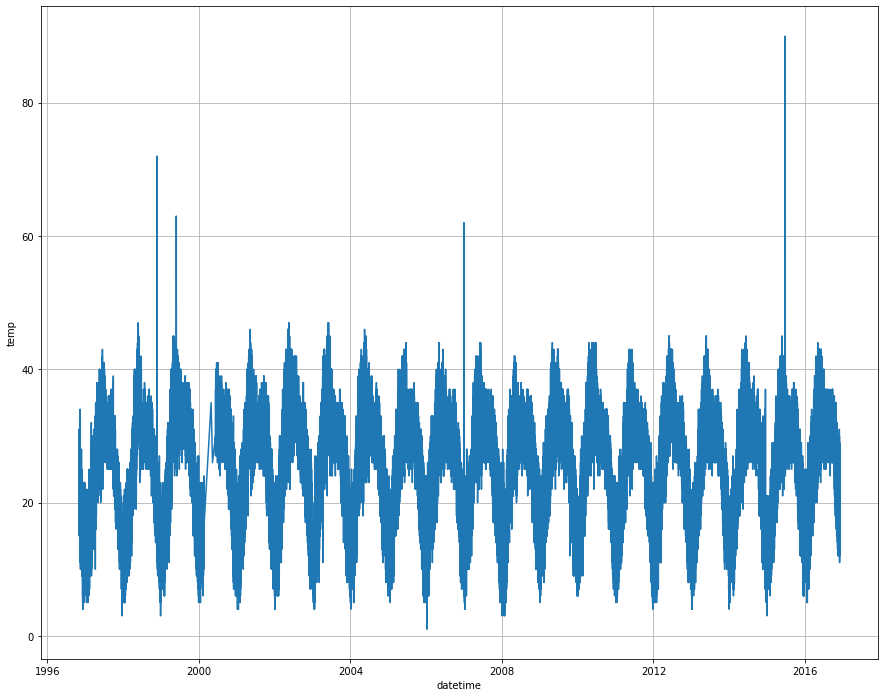

In [50]:
plt.figure(figsize=(15,12))
sns.lineplot(x=df.iloc[:,0],y=df['temp'])
plt.grid()
plt.show()

In [53]:
df[['temp']].head()

,temp
0,30.0
1,28.0
2,24.0
3,24.0
4,23.0


In [54]:
df.iloc[:,11].mean()

25.57842718130369

In [55]:
df.isna().sum()

datetime          0
conds            68
dewptm          619
fog               0
hail              0
heatindex     69802
hum             753
precipm       98913
pressurem       231
rain              0
snow              0
temp            669
thunder           0
tornado           0
vism           4416
wdird         14380
wdire         14380
wgustm        97850
windchillm    98340
wspdm          2353
dtype: int64

In [60]:
df.iloc[:,11]=df.iloc[:,11].fillna(method='ffill')

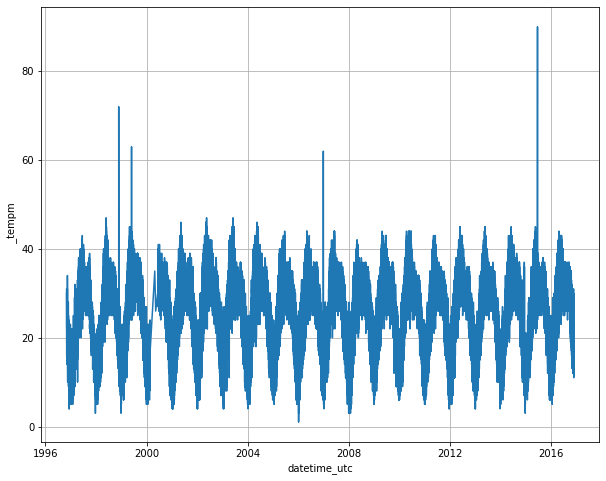

In [76]:
plt.figure(figsize=(10,8))
sns.lineplot(x=df.iloc[:,0],y=df.iloc[:,11])
plt.grid()
plt.show()

/home/varun/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


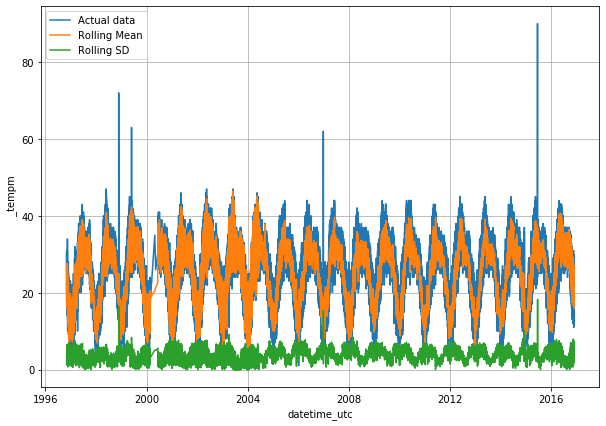

In [10]:
plt.figure(figsize=(10,7))
sns.lineplot(x=df.iloc[:,0],y=df.iloc[:,11])
sns.lineplot(x=df.iloc[:,0],y=df.iloc[:,11].rolling(12).mean())
sns.lineplot(x=df.iloc[:,0],y=df.iloc[:,11].rolling(12).std())
plt.legend(["Actual data","Rolling Mean","Rolling SD"])
plt.grid()
plt.show()

In [8]:
#Augumented dickey fuller test
from statsmodels.tsa.stattools import adfuller
adfuller(df.iloc[:,11].values)

(-7.592449082427087,
 2.5105261051502868e-11,
 68,
 98844,
 {'1%': -3.4304161595021574,
  '5%': -2.8615692414596667,
  '10%': -2.5667855642064112},
 415694.4851577056)

In [62]:
#converting to stationary dataset
from statsmodels.tsa.seasonal import seasonal_decompose
result= seasonal_decompose(df['temp'],extrapolate_trend='freq',freq=14)

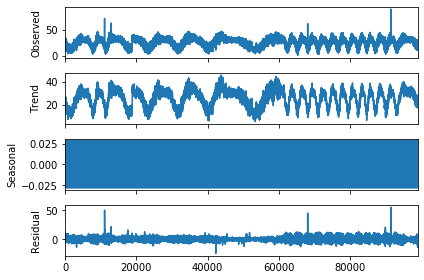

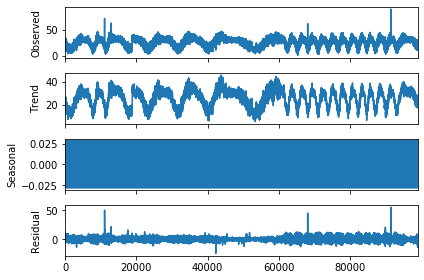

In [63]:
result.plot()

In [64]:
#Extracting Residual part
dfRES=result.resid
dfRES.head()

0    13.411166
1    10.933696
2     6.441518
3     5.961284
4     4.468303
Name: temp, dtype: float64

/home/varun/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


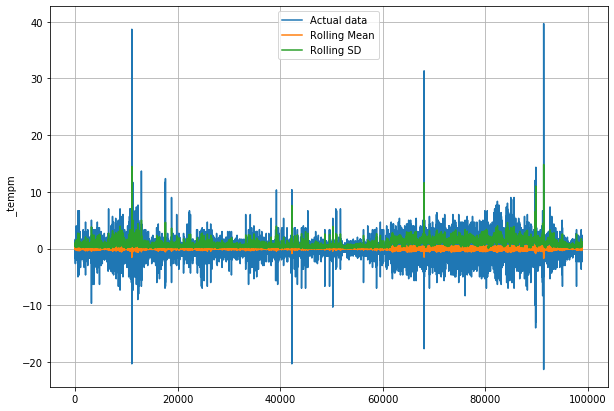

In [36]:
#check stationary for the Residual part
plt.figure(figsize=(10,7))
sns.lineplot(x=dfRES.index,y=dfRES.values)
sns.lineplot(x=dfRES.index,y=dfRES.rolling(12).mean())
sns.lineplot(x=dfRES.index,y=dfRES.rolling(12).std())
plt.legend(["Actual data","Rolling Mean","Rolling SD"])
plt.grid()
plt.show()

In [66]:
adfuller(dfRES)

(-71.1391720911334,
 0.0,
 68,
 98844,
 {'1%': -3.4304161595021574,
  '5%': -2.8615692414596667,
  '10%': -2.5667855642064112},
 372902.753310052)

/home/varun/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


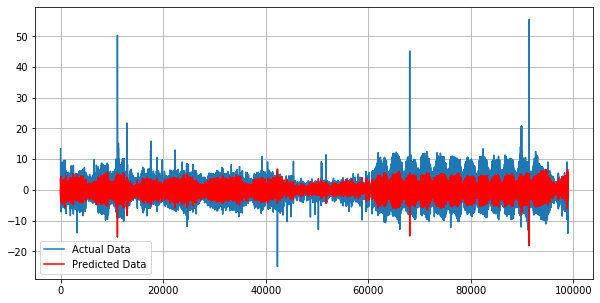

In [72]:
#ARIMA Model
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(dfRES,order=(2,1,2))
results_MA=model.fit()
plt.figure(figsize=(10,5))
plt.plot(dfRES)
plt.plot(results_MA.fittedvalues,color='red')
plt.legend(["Actual Data","Predicted Data"])
plt.grid()
plt.show()

In [73]:
#Adding the removed trends and seasonality
resultFinal=results_MA.fittedvalues+result.seasonal+result.trend
resultFinal.head()

0          NaN
1    17.066304
2    16.901540
3    17.147068
4    19.758203
dtype: float64

In [79]:
resultFinal

0              NaN
1        17.066304
2        16.901540
3        17.147068
4        19.758203
5        20.513211
6        21.269808
7        24.142621
8        23.724724
9        24.054806
10       24.607850
11       24.664094
12       24.919147
13       25.433061
14       26.136468
15       26.994255
16       27.558927
17       27.603907
18       27.589359
19       26.744943
20       25.877131
21       24.866412
22       24.139660
23       23.742315
24       23.390286
25       23.244743
26       23.593133
27       23.726105
28       23.833307
29       23.324247
           ...    
98883    20.836262
98884    19.986246
98885    18.965191
98886    18.397303
98887    18.182498
98888    18.187386
98889    19.650353
98890    20.115970
98891    20.524564
98892    20.388642
98893    19.243031
98894    18.861738
98895    19.361369
98896    20.324106
98897    21.484390
98898    22.234953
98899    22.357599
98900    22.168727
98901    21.544524
98902    20.738941
98903    20.537978
98904    20.

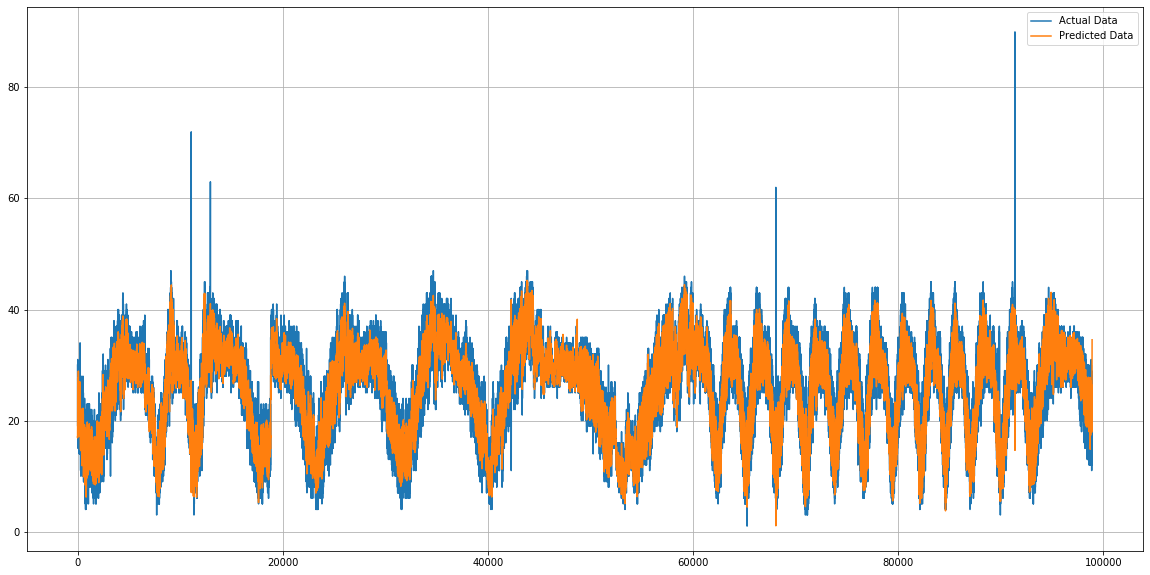

In [75]:
#Plot actual VS. Estimated
plt.figure(figsize=(20,10))
plt.plot(df['temp'])
plt.plot(resultFinal)
plt.legend(["Actual Data","Predicted Data"])
plt.grid()
plt.show()